# Tarea 1 

# Física Estadística

## Diego Barón, Universidad de Antioquia

## Resumen

En este trabajo se presenta la solución a los problemas planteados en la primera tarea por el profesor Johans Restrepo. Se presenta la construcción de las densidades de probabilidad para una partícula en un potencial armónico, tanto por el método de cadenas Markovianas de Monte Carlo y el método analítico. Adicionalmente, al final se hace una comparación entre las densidades de probabilidad clásicas y cuánticas de una partícula en un potencial armónico, incluyendo una respectiva discusión. Todos los programas para la generación de gráficas y calculos están incluidos

### Palabras clave: 
Matriz densidad, Oscilador Armónico, Monte Carlo Markov Chain

#### NOTA: Este notebook debe ser corrido desde el principio para que funcione debidamente.







# Introducción

Los métodos de Monte Carlo datan de mediados de los años 40 y son una herramienta muy poderosa para el cálculo de expresiones matemáticas complejas. Es famosa la forma de calcular áreas o volumenes mediante el uso de estos métodos. Primero, el área se inscribe en una figura geométrica conocida, como un cuadrado y luego se generan N puntos aleatorios dentro del cuadrado. Luego se deben contar en numero de puntos que han caído dentro de la figura a la que queremos calcular el área. Si a cada punto que cae dentro de la figura lo llamamos "acierto", entonces el área de la figura sera proporcional a:



$A=A_c\frac{N_{aciertos}}{N}$

Donde $A_c$, es el área de la figura que conocemos. A medida que se aumenta en numero total de puntos generados aleatoriamente aumenta la precisión en el cálculo del aŕea. 

Por otra parte estos métodos permiten generar muestreos compatibles con cualquier densidad de probabilidad. En particular el algoritmo de Metropolis-Hastings nos permite generar una caminata aleatoria congruente con cierta densidad de probabilidad. Es con este método que haremos el calculo numérico de las densidades de probabilidad para el oscilador armónico en cada estado n.

In [3]:
#IMPORTANDO LIBRERIAS DE GRAFICACION Y CALCULO

import numpy as np
%pylab inline


Populating the interactive namespace from numpy and matplotlib


# Resultados y discusión

En esta sección se presentan los resultados obtenidos, discusiones acerca de los mismos y los programas que se han utilizados.


#  Particula en un potencial armónico a temperatura $T\to0$
## Caso clásico

###  Demostración probabilidad clasica $\pi_{clas}(x)$
<img src="CasoClasico.jpg",width=700,height=710>


En este caso vamos a ver que sucede a medida que nos acercamos a la temperatura $T=0$. Es decir a medida que $\beta\to \infty$ 





Text(0,0.5,u'Densidad de probabilidad')

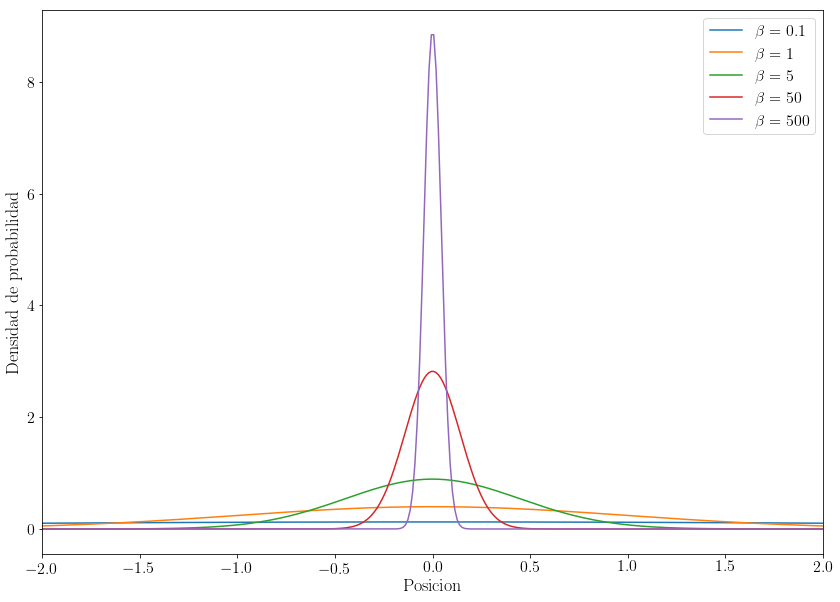

In [4]:
# PROGRAMA PARA GENERAR GRAFICAS DE PROBABILIDAD CLASICA VS BETA

def piclas(beta):
    x=np.linspace(-3,3,500)
    y=np.sqrt(beta/(2*np.pi))*np.exp(-x*x*beta/2.0)
    ejes=[x,y]
    return ejes
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams['figure.figsize'] = [14, 10]
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16)

beta01=plt.plot(piclas(0.1)[0],piclas(0.1)[1],label=r"$\beta=0.1$")
beta1=plt.plot(piclas(1)[0],piclas(1)[1],label=r"$\beta=1$")
beta5=plt.plot(piclas(5)[0],piclas(5)[1],label=r"$\beta=5$")
beta50=plt.plot(piclas(50)[0],piclas(50)[1],label=r"$\beta=50$")
beta500=plt.plot(piclas(500)[0],piclas(500)[1],label=r"$\beta=500$")
xlim(-2,2)
plt.legend(prop={'size': 16})
plt.xlabel("Posicion",fontsize=18)
plt.ylabel("Densidad de probabilidad",fontsize=18)


Podemos ver que a medida que $\beta \to \infty$  la funcion $\pi_{class}(x)$ se va convirtiendo en una delta de Dirac $\delta(x)$, de hecho esto no es de extrañar ya que:
$$\delta(x)=\lim_{n\to\infty}\frac{n}{\sqrt{\pi}}e^{(-n^2x^2)}$$ 

en nuestro caso con $n=\sqrt{\frac{\beta}{2}}$. Por tanto cuando $\beta \to \infty$ tenemos que $\pi_{class}(x)=\delta(x)$, lo que representa una partícula quieta en $x=0$.

## Caso cuántico

### Estado Base n=0

En este caso usamos el algoritmo Markov-chain Monte Carlo Metropolis para el muestreo de posiciones:

In [5]:
# ALGORITMO Markov-chain Monte Carlo Metropolis

datos=[]
x=0
delta=1
for k in range(1000000):
    x_n=x+random.uniform(-delta,delta)
    if random.uniform(0,1)< np.exp(-x_n**2)/np.exp(-x**2):
        x=x_n
        datos.append(x)

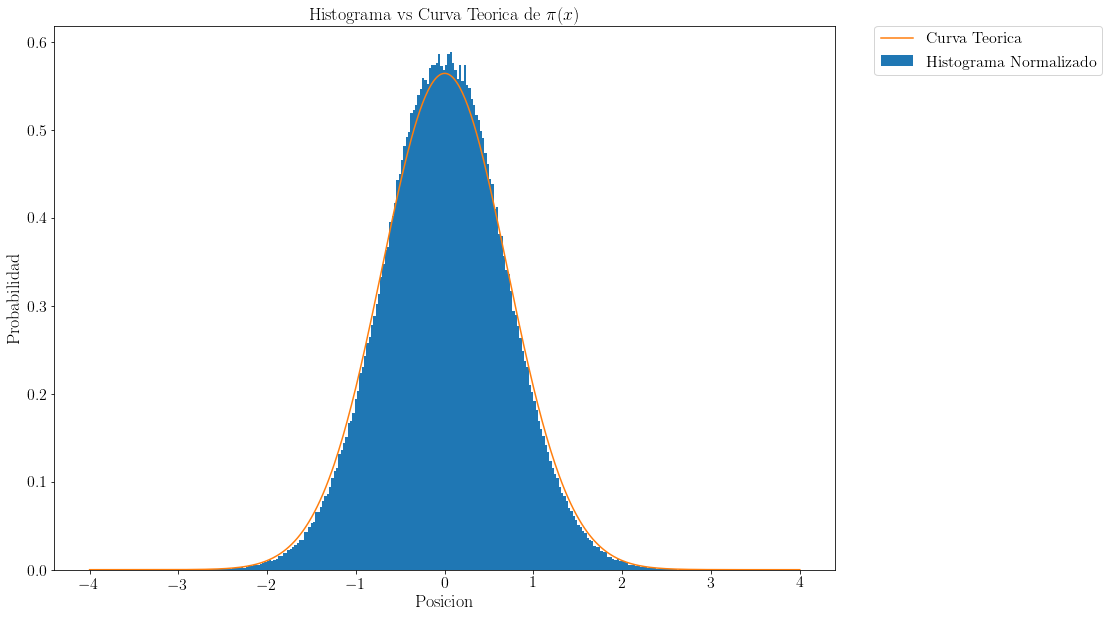

In [6]:
# ALGORITMO GRAFICACION 

n_bins = 250

# CURVA TEORICA

x_wf=np.linspace(-4,4,500)
y=(1/np.pi**0.5)*np.exp(-x_wf**2)


plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams['figure.figsize'] = [14, 10]
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16)



histograma=plt.hist(datos, bins=n_bins,normed=True,label="Histograma Normalizado")
wf=plt.plot(x_wf,y,label="Curva Teorica")

plt.xlabel("Posicion",fontsize=18)
plt.ylabel("Probabilidad",fontsize=18)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 16})

plt.title(r"Histograma vs Curva Teorica de $\pi(x)$",fontsize=18)
plt.show()


Vemos como en este caso la curva teórica y el histograma tienen la misma forma.


### Estados excitados

En este caso, debemos primero empezar generando las funciones de onda de niveles excitados mediante las relaciones de recursión que nos proveen los polinomios de Hermite. 

Text(0.5,1,u'Funciones de onda')

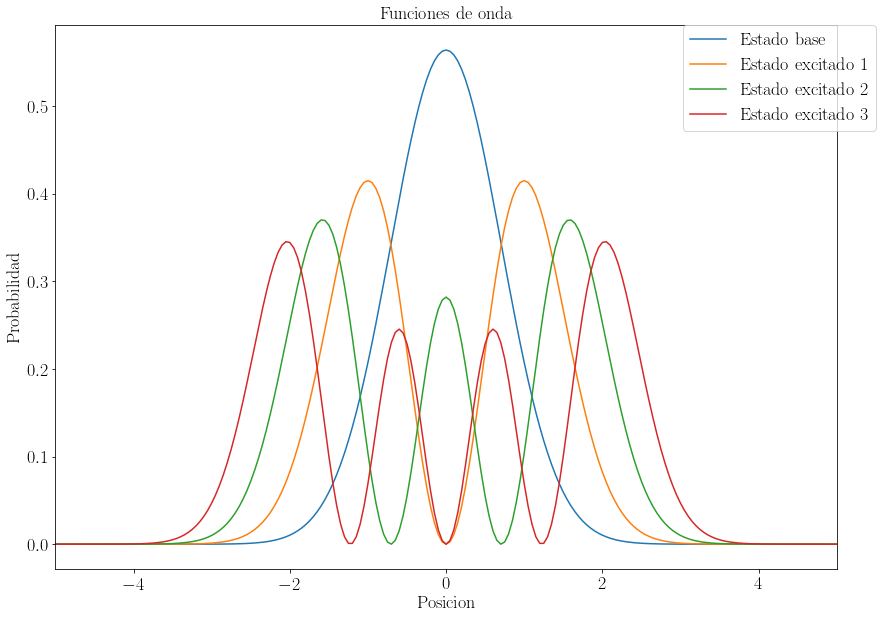

In [13]:
# RUTINA PARA CALCULAR LAS FUNCIONES DE ONDA HASTA N=15 GRAFICA DE LAS MISMAS HASTA N=4

n_states=15
grid_x=[i*0.05 for i in range(-1000,1000)]
grid_xround=[round(j,4) for j in grid_x]
psi={}
for x in grid_xround:
    psi[x]=[np.exp(-x**2/2.0)/np.pi**0.25]
    psi[x].append(np.sqrt(2)*x*psi[x][0])
    for n in range(2,n_states):
        psi[x].append(np.sqrt(2.0/n)*x*psi[x][n-1]-np.sqrt((n-1.0)/n)*psi[x][n-2])
        
    
psi_0=np.array([psi[x][0] for x in grid_xround])
psi_1=np.array([psi[x][1] for x in grid_xround])
psi_2=np.array([psi[x][2] for x in grid_xround])
psi_3=np.array([psi[x][3] for x in grid_xround])

# GRAFICA DE LAS FUCIONES DE ONDA HASTA N=3

matplotlib.rcParams['figure.figsize'] = [14, 10]
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18)


p0=plt.plot(grid_xround,psi_0*psi_0,label="Estado base")
p1=plt.plot(grid_xround,psi_1*psi_1,label="Estado excitado 1")
p2=plt.plot(grid_xround,psi_2*psi_2,label="Estado excitado 2")
p3=plt.plot(grid_xround,psi_3*psi_3,label="Estado excitado 3")
plt.xlabel("Posicion",fontsize=18)
plt.ylabel("Probabilidad",fontsize=18)
plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.,fontsize=18)

xlim(-5,5)

plt.title(r"Funciones de onda",fontsize=18)



Lo siguiente, a modo de prueba de consistencia, es ver si tambien podemos generar los histogramas de las densidades de probabilidad para algunos estados excitados utilizando el algoritmo de Metropolis-Hastings, veamos:

In [14]:
# FUNCION PARA GENERAR CAMINATA ALEATORIA
def paso(a,b):
    import random
    x=random.random()
    c=random.randint(0,5)
    if x>0.5:
        return a*c
    else:
        return b*c

In [15]:

    

# GENERANDO HISTOGRAMAS A MISMO NIVEL DE ENERGIA USANDO Markov-chain Monte Carlo Metropolis

# ESTADO BASE
datos0=[]
x=0.0
delta=0.05
for k in range(2000000):
    x_n=round(x+paso(-delta,delta),4)
    if random.uniform(0,1)< psi[x_n][0]*psi[x_n][0]/(psi[x][0]*psi[x][0]):
        x=x_n
        datos0.append(x)
        
# PRIMER ESTADO EXCITADO
        
datos1=[]
x=0.05
delta=0.05
for k in range(1000000):
    x_n=round(x+paso(-delta,delta),4)
    while x_n==0:
        x_n=x_n+round(x+paso(-delta,delta),4)
    if random.uniform(0,1)< psi[x_n][1]*psi[x_n][1]/(psi[x][1]*psi[x][1]):
        x=x_n
        datos1.append(x)
x=-0.05
delta=0.05
for k in range(1000000):
    x_n=round(x+paso(-delta,delta),4)
    while x_n==0:
        x_n=x_n+round(x+paso(-delta,delta),4)
    if random.uniform(0,1)< psi[x_n][1]*psi[x_n][1]/(psi[x][1]*psi[x][1]):
        x=x_n
        datos1.append(x)


# SEGUNDO ESTADO EXCITADO

datos2=[]
x=0.0
delta=0.05
for k in range(2000000):
    x_n=round(x+paso(-delta,delta),4)
    if random.uniform(0,1)< psi[x_n][2]*psi[x_n][2]/(psi[x][2]*psi[x][2]):
        x=x_n
        datos2.append(x)
        
        
# TERCER ESTADO EXCITADO

datos3=[]
x=0.05
delta=0.05
for k in range(1000000):
    x_n=round(x+paso(-delta,delta),4)
    while x_n==0:
        x_n=x_n+round(x+paso(-delta,delta),4)
    if random.uniform(0,1)< psi[x_n][3]*psi[x_n][3]/(psi[x][3]*psi[x][3]):
        x=x_n
        datos3.append(x)
x=-0.05
delta=0.05
for k in range(1000000):
    x_n=round(x+paso(-delta,delta),4)
    while x_n==0:
        x_n=x_n+round(x+paso(-delta,delta),4)
    if random.uniform(0,1)< psi[x_n][3]*psi[x_n][3]/(psi[x][3]*psi[x][3]):
        x=x_n
        datos3.append(x)


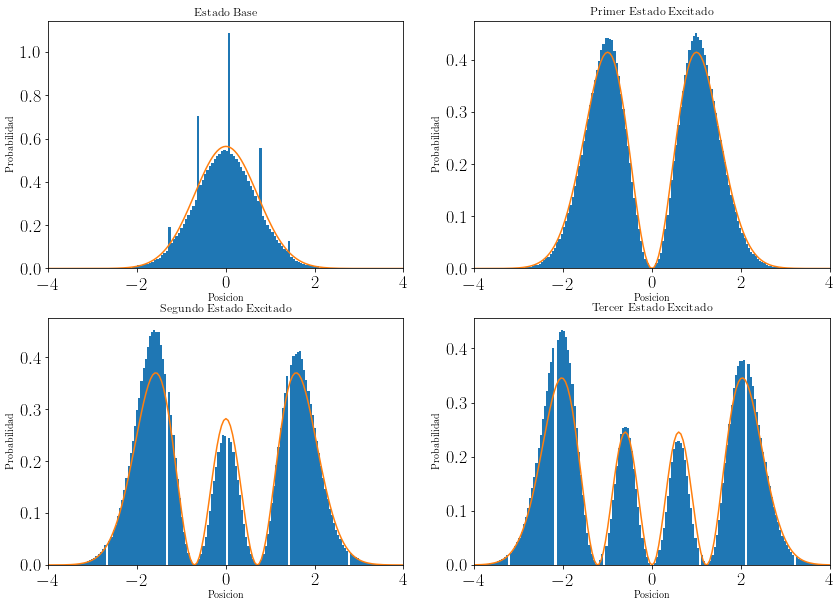

In [16]:
# GRAFICA HISTOGRAMAS


matplotlib.rcParams['figure.figsize'] = [14, 10]
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18)


plt.subplot(221)
plt.hist(datos0, bins=125,normed=True,label="Histograma Normalizado")
plt.xlabel("Posicion")
plt.ylabel("Probabilidad")
plt.title("Estado Base")

p0=plt.plot(grid_xround,psi_0*psi_0,label="Estado base")
xlim(-4,4)

plt.subplot(222)
plt.hist(datos1, bins=150,normed=True,label="Histograma Normalizado")
plt.xlabel("Posicion")
plt.ylabel("Probabilidad")
plt.title("Primer Estado Excitado")

p1=plt.plot(grid_xround,psi_1*psi_1,label="Estado excitado 1")
xlim(-4,4)

plt.subplot(223)
plt.hist(datos2, bins=170,normed=True,label="Histograma Normalizado")
plt.xlabel("Posicion")
plt.ylabel("Probabilidad")
plt.title("Segundo Estado Excitado")

p2=plt.plot(grid_xround,psi_2*psi_2,label="Estado excitado 2")
xlim(-4,4)

plt.subplot(224)
plt.hist(datos3, bins=180,normed=True,label="Histograma Normalizado")
plt.xlabel("Posicion")
plt.ylabel("Probabilidad")
plt.title("Tercer Estado Excitado")

p3=plt.plot(grid_xround,psi_3*psi_3,label="Estado excitado 3")
xlim(-4,4)
plt.show()

Esta última gráfica nos muestra como el metodo de Metropolis-Hastings aún puede ser usado para estados excitados con cierta precisión. Sin embargo, es menos preciso que en el caso del estado base donde tenemos la expresión exacta de la funcion de onda.

# Partícula cuántica en un potencial armónico a temperatura finita

Para simular este caso vamos a aplicar el método de Metropolis-Hastings pero en este caso vamos a hacer dos movidas. Una en la posición de la partícula y la otra en energía con posición constante de tal manera que generemos las densidades de probabilidad a temperaturas diferentes. En nuestro caso $\beta=5,1$ y $0.2$, veamos:

In [17]:
#$ MOVIDAS DE n A m

# Temperatura beta=5

n=random.randint(0,14)
beta=5
datosb5=[]
x=0.05
delta=0.05
for k in range(500000):
    x_n=round(x+paso(-delta,delta),4)
    if random.uniform(0,1)< psi[x_n][n]*psi[x_n][n]/(psi[x][n]*psi[x][n]): # MOVIDA EN POSICION
        x=x_n
        if random.uniform(0,1)>0.5: # MOVIDAS EN NIVEL ENERGETICO
            m=n+1
        else:
            m=n-1
        if m<0 or m>14:
            m=n
        
        if random.uniform(0,1)< (psi[x_n][m]*psi[x_n][m]/(psi[x_n][n]*psi[x_n][n]))*np.exp(-beta*(m-n)):
            n=m
            datosb5.append(x)
x=-0.05
for k in range(500000):
    x_n=round(x+paso(-delta,delta),4)
    if random.uniform(0,1)< psi[x_n][n]*psi[x_n][n]/(psi[x][n]*psi[x][n]): 
        x=x_n
        if random.uniform(0,1)>0.5:
            m=n+1
        else:
            m=n-1
        if m<0 or m>14:
            m=n
        
        if random.uniform(0,1)< (psi[x_n][m]*psi[x_n][m]/(psi[x_n][n]*psi[x_n][n]))*np.exp(-beta*(m-n)):
            n=m
            datosb5.append(x)
      
            

# Temperatura b=1            
            
n=random.randint(0,14)
beta=1
datosb1=[]
x=0.05
delta=0.05
for k in range(500000):
    x_n=round(x+paso(-delta,delta),4)
    if random.uniform(0,1)< psi[x_n][n]*psi[x_n][n]/(psi[x][n]*psi[x][n]):
        x=x_n
        if random.uniform(0,1)>0.5:
            m=n+1
        else:
            m=n-1
        if m<0 or m>14:
            m=n
        
        if random.uniform(0,1)< (psi[x_n][m]*psi[x_n][m]/(psi[x_n][n]*psi[x_n][n]))*np.exp(-beta*(m-n)):
            n=m
            datosb1.append(x)
x=-0.05
delta=0.05
for k in range(500000):
    x_n=round(x+paso(-delta,delta),4)
    if random.uniform(0,1)< psi[x_n][n]*psi[x_n][n]/(psi[x][n]*psi[x][n]):
        x=x_n
        if random.uniform(0,1)>0.5:
            m=n+1
        else:
            m=n-1
        if m<0 or m>14:
            m=n
        
        if random.uniform(0,1)< (psi[x_n][m]*psi[x_n][m]/(psi[x_n][n]*psi[x_n][n]))*np.exp(-beta*(m-n)):
            n=m
            datosb1.append(x)
        
            

# Temperatura b=0.2
            
n=random.randint(0,14)
beta=0.2
datosb0p2=[]
x=0.05
delta=0.05
for k in range(1000000):
    x_n=round(x+paso(-delta,delta),4)
    
    if random.uniform(0,1)< psi[x_n][n]*psi[x_n][n]/(psi[x][n]*psi[x][n]):
        x=x_n
        if random.uniform(0,1)>0.5:
            m=n+1
        else:
            m=n-1
        if m<0 or m>14:
            m=n
        
        if random.uniform(0,1)< (psi[x_n][m]*psi[x_n][m]/(psi[x_n][n]*psi[x_n][n]))*np.exp(-beta*(m-n)):
            n=m
            datosb0p2.append(x)

x=-0.05
delta=0.05
for k in range(500000):
    x_n=round(x+paso(-delta,delta),4)
    if random.uniform(0,1)< psi[x_n][n]*psi[x_n][n]/(psi[x][n]*psi[x][n]):
        x=x_n
        if random.uniform(0,1)>0.5:
            m=n+1
        else:
            m=n-1
        if m<0 or m>14:
            m=n
        
        if random.uniform(0,1)< (psi[x_n][m]*psi[x_n][m]/(psi[x_n][n]*psi[x_n][n]))*np.exp(-beta*(m-n)):
            n=m
            datosb0p2.append(x)
        
        
            

Para poder comparar con las distribuciones teóricas, tanto clásica como cuántica primero mostremos la probabilidad cuantica que es la que nos falta:

# Demostración probabilidad cuántica $\pi_{QM}(x)$
<img src="CC1.jpg",width=800,height=810>
<img src="CC2.jpg",width=800,height=810>
<img src="CC3.jpg",width=800,height=810>

## Temperatura $\beta=5$

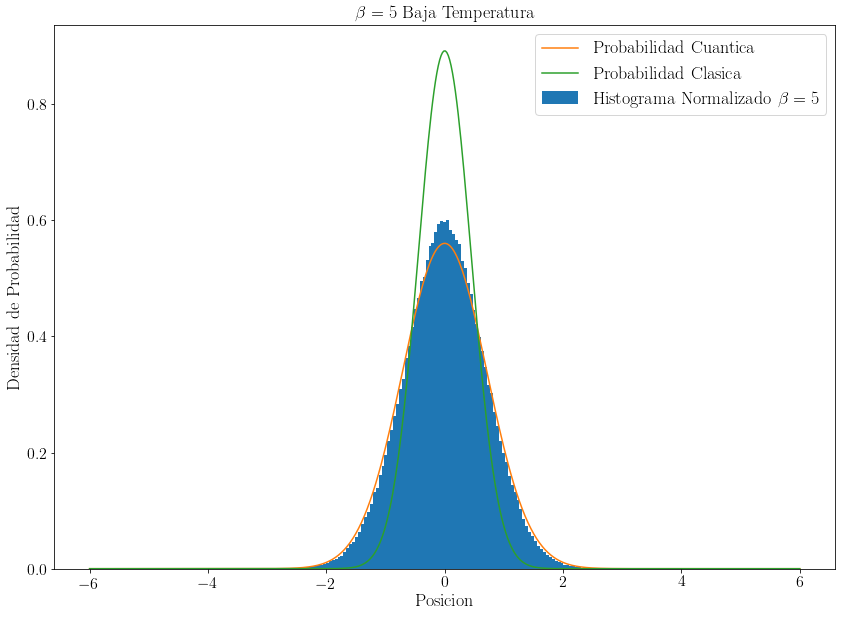

In [44]:
def piquan(beta):
    x=np.linspace(-6,6,500)
    y=np.sqrt(np.tanh(beta/2.0)/np.pi)*np.exp(-x*x*np.tanh(beta/2.0))
    ejes=[x,y]
    return ejes
def piclas(beta):
    x=np.linspace(-6,6,500)
    y=np.sqrt(beta/(2*np.pi))*np.exp(-x*x*beta/2.0)
    ejes=[x,y]
    return ejes


plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams['figure.figsize'] = [14, 10]
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16)
histo_energia=plt.hist(datosb5, bins=120,normed=True,label=r"Histograma Normalizado $\beta=5$")
quantum=plt.plot(piquan(5)[0],piquan(5)[1],label="Probabilidad Cuantica")
clas=plt.plot(piclas(5)[0],piclas(5)[1],label="Probabilidad Clasica")

plt.title(r"$\beta=5$ Baja Temperatura",fontsize=18)
plt.xlabel("Posicion",fontsize=18)
plt.ylabel("Densidad de Probabilidad",fontsize=18)

plt.legend(fontsize=18)

Podemos ver que a baja temperatura la curva de Probabilidad clásica se aleja mucho del histograma simulado, mientras que la densidad de probabiliad cuántica se ajusta bien al histograma. Esto es de esperar ya que a baja temperatura la partícula tiende a estar en los estados más bajos de energía.


## Temperatura $\beta=1$

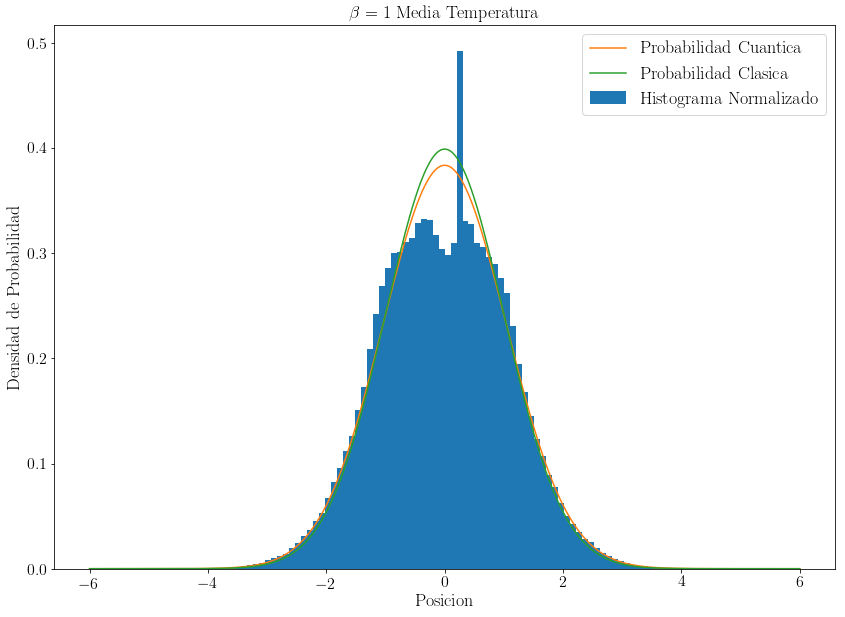

In [39]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams['figure.figsize'] = [14, 10]
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16)
histo_energia2=plt.hist(datosb1, bins=86,normed=True,label="Histograma Normalizado")
quantum=plt.plot(piquan(1)[0],piquan(1)[1],label="Probabilidad Cuantica")
clas=plt.plot(piclas(1)[0],piclas(1)[1],label="Probabilidad Clasica")
plt.title(r"$\beta=1$ Media Temperatura",fontsize=18)
plt.xlabel("Posicion",fontsize=18)
plt.ylabel("Densidad de Probabilidad",fontsize=18)

plt.legend(fontsize=18)

A temperatura mediana se puede ver que las curvas teóricas clásica y cuántica se empiezan a parecer. Sin embargo aquella que más se ajusta al histograma es la densidad de probabilidad cuántica.

## Temperatura $\beta=0.2$

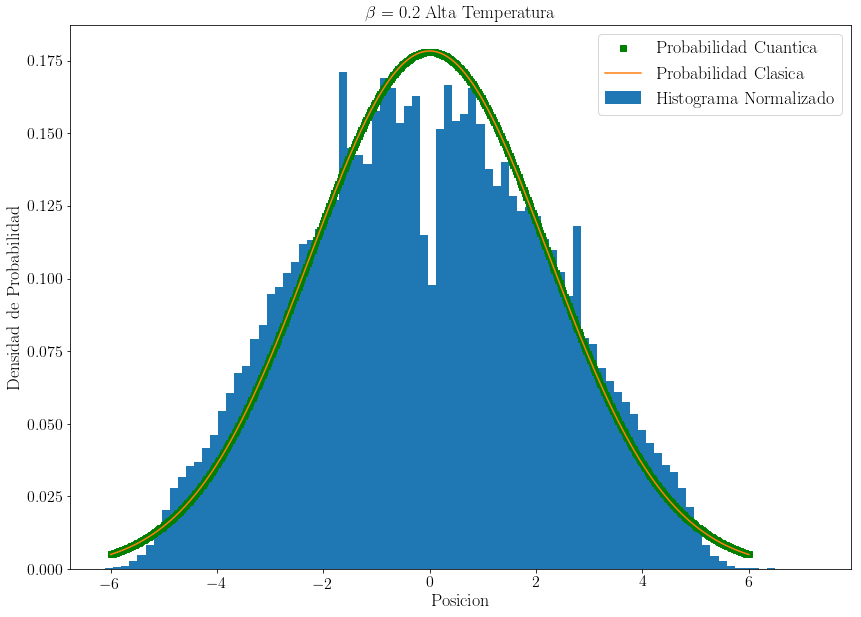

In [40]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams['figure.figsize'] = [14, 10]
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16)
histo_energia3=plt.hist(datosb0p2, bins=88,normed=True,label="Histograma Normalizado")
quantum=plt.plot(piquan(0.2)[0],piquan(0.2)[1],'gs',label="Probabilidad Cuantica")
clas=plt.plot(piclas(0.2)[0],piclas(0.2)[1],label="Probabilidad Clasica")
plt.title(r"$\beta=0.2$ Alta Temperatura",fontsize=18)
plt.xlabel("Posicion",fontsize=18)
plt.ylabel("Densidad de Probabilidad",fontsize=18)

plt.legend(fontsize=18)

En este caso obtenemos un histograma que se ajusta a la curva de densidad de probabilidad clásica, la cual ahora es indistinguible del caso cuántico. Esto es de esperar debido al principio de correspondencia de Bohr.

# Conclusiones

Durante el desarrolllo de este trabajo hemos visto como los métodos de MonteCarlo-Hastings funcionan para muestrear funciones de densidad de probabilidad. Este método lo hemos aplicado para el caso de una partícula en un potencial armónico y nos ha permitido calcular tanto las densidades de probabilidad a temperatura cero como en el caso de temperatura finita. En este útlimo caso hemos podido observar como las curvas de densidad de probabilidad clásica y cuántica se ajustan, dependiendo de la temperatura, al histograma simulado. Como era de esperar a baja temperatura las leyes de la mecánica cuántica son dominantes y a alta temperatura, obtenemos que las curvas clásica y cuántica se solapan en concordancia con el principio de correspondencia.

# Bibliografía


1. Thermodynamics and Statistical Mechanics
Authors: Greiner, Walter, Neise, Ludwig, Stöcker, Horst
2. Statistical Mechanics: Algorithms and Computations
Author: Werner Krauth